In [1]:
!pip install arabic_reshaper

In [2]:
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 6.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd

working_folder = '/content/drive/My Drive/TransformersCode/03-restaurant/Find_meals/'

csv_file_path = os.path.join(working_folder, 'indian_food.csv')
df = pd.read_csv(csv_file_path)

df.head()

,name,ARname,ingredients,ARingredients,diet,ARdiet,prep_time,cook_time,flavor_profile,course,ARflavor_profile,ARcourse,state,region
0,Balu shahi,بالو شاهي,"Maida flour, yogurt, oil, sugar",دقيق مائدة، زبادي، زيت، سكر,vegetarian,نباتي,45,25,sweet,dessert,حلو,تحلية,West Bengal,East
1,Boondi,بوندي,"Gram flour, ghee, sugar",جرام دقيق، سمن، سكر,vegetarian,نباتي,80,30,sweet,dessert,حلو,تحلية,Rajasthan,West
2,Gajar ka halwa,جاجار كا حلوة,"Carrots, milk, sugar, ghee, cashews, raisins",جزر، حليب، سكر، سمن، كاجو، زبيب,vegetarian,نباتي,15,60,sweet,dessert,حلو,تحلية,Punjab,North
3,Ghevar,غيفار,"Flour, ghee, kewra, milk, clarified butter, su...",طحين، سمن، كيورا، حليب، زبدة، سكر، لوز، فستق، ...,vegetarian,نباتي,15,30,sweet,dessert,حلو,تحلية,Rajasthan,West
4,Gulab beef,جلاب بقر,"Milk powder, plain flour, baking powder, ghee,...",حليب بودرة ، دقيق عادي ، بيكنج باودر ، سمن ، ح...,vegetarian,نباتي,15,40,sweet,dessert,حلو,تحلية,West Bengal,East


In [5]:
import numpy as np
similarities_file = working_folder + "cosine_similarity_matrix.npy"

similarities = np.load(similarities_file)
print(f"Similarity matrix loaded from {similarities_file}")
print(similarities.shape)
print(similarities)

Similarity matrix loaded from /content/drive/My Drive/TransformersCode/03-restaurant/Find_meals/cosine_similarity_matrix.npy
(255, 255)
[[1.0000001  0.6945308  0.61966586 ... 0.3559543  0.24791378 0.23562291]
 [0.6945308  1.         0.68130034 ... 0.4211163  0.3362406  0.24663337]
 [0.61966586 0.68130034 1.         ... 0.442216   0.42944115 0.32536662]
 ...
 [0.3559543  0.4211163  0.442216   ... 1.0000001  0.539516   0.35049137]
 [0.24791378 0.3362406  0.42944115 ... 0.539516   1.         0.41640878]
 [0.23562291 0.24663337 0.32536662 ... 0.35049137 0.41640878 1.        ]]


In [6]:
def get_index(recipe_name):
    return df[df.ARname == recipe_name].index[0]

def get_recipe(index):
    return df.iloc[index]['ARname']

def get_recipe_recommendations(recipe_name):

    index = get_index(recipe_name)

    sims = similarities[index]
    scores = list(enumerate(sims))
    print(scores)

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_scores

recipe_name = 'دجاج بالزبدة'
sorted_scores=get_recipe_recommendations(recipe_name)
for recipe in sorted_scores[:5]:
    index=recipe[0]
    score=recipe[1]
    recipe=get_recipe(index)
    print(recipe, score)

[(0, 0.38992447), (1, 0.37415645), (2, 0.510067), (3, 0.5070334), (4, 0.45793724), (5, 0.2656879), (6, 0.5233213), (7, 0.33939695), (8, 0.36237568), (9, 0.18840125), (10, 0.37415645), (11, 0.47466385), (12, 0.4851936), (13, 0.45546234), (14, 0.18307501), (15, 0.48235837), (16, 0.47236747), (17, 0.42159757), (18, 0.31192812), (19, 0.43053585), (20, 0.30093467), (21, 0.34584743), (22, 0.31403357), (23, 0.4825818), (24, 0.47370726), (25, 0.30093467), (26, 0.41282177), (27, 0.5045486), (28, 0.3628612), (29, 0.3864303), (30, 0.3794809), (31, 0.37299314), (32, 0.34997797), (33, 0.3706513), (34, 0.23687983), (35, 0.37132847), (36, 0.40574133), (37, 0.45578596), (38, 0.68762136), (39, 0.3751437), (40, 0.28211716), (41, 0.39874405), (42, 0.37721324), (43, 0.35675508), (44, 0.27705228), (45, 0.6215813), (46, 0.5774698), (47, 0.37381756), (48, 0.31340048), (49, 0.51406795), (50, 0.39354497), (51, 0.3017887), (52, 0.41655755), (53, 0.49806252), (54, 0.5246681), (55, 0.42144245), (56, 0.37854168), 

In [7]:
def get_recipe_recommendations_from_previous_orders(previous_orders):

    indices = [get_index(recipe_name) for recipe_name in previous_orders]

    sims = similarities[indices]

    avg_similarity = sims.mean(axis=0)

    scores = list(enumerate(avg_similarity))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_scores

previous_orders = ['دجاج بالزبدة', 'دجاج تكا ماسالا']

recommendations = get_recipe_recommendations_from_previous_orders(previous_orders)

top_recommendations = recommendations[:10]

top_indices = [rec[0] for rec in top_recommendations]

top_scores = [rec[1] for rec in top_recommendations]

top_names = [get_recipe(idx) for idx in top_indices]

for i in range(10):
    print(top_names[i])

دجاج تكا ماسالا
دجاج بالزبدة
رازالا دجاج
دجاج فاروفال
دجاج تيكا
كفتة
بانير زبدة ماسالا
ألو شيملا ميرش
بالاك بانير
رونجي


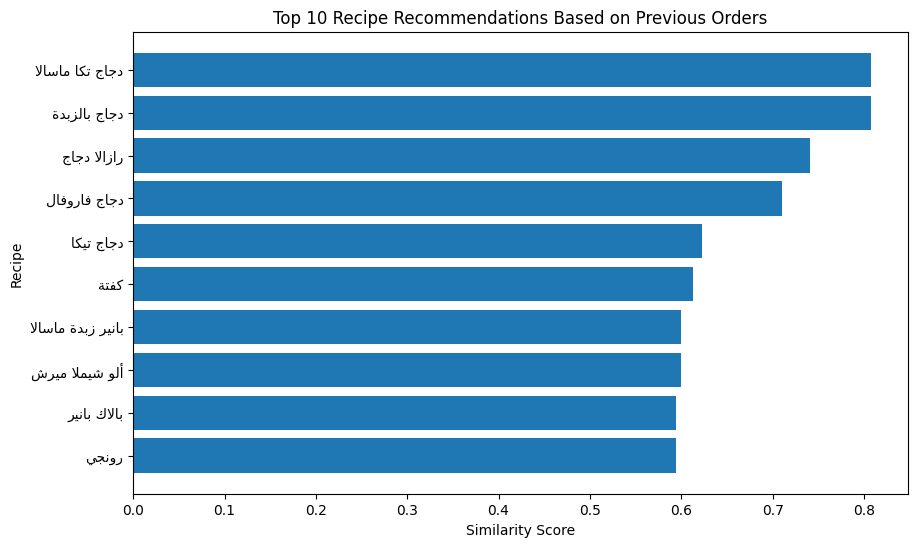

In [8]:
import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

top_names_display = [get_display(arabic_reshaper.reshape(name)) for name in top_names]

top_df = pd.DataFrame({'Recipe': top_names_display, 'Similarity Score': top_scores})

plt.figure(figsize=(10, 6))
bars = plt.barh(top_df['Recipe'], top_df['Similarity Score'])
plt.xlabel('Similarity Score')
plt.ylabel('Recipe')
plt.title('Top 10 Recipe Recommendations Based on Previous Orders')

plt.gca().invert_yaxis()

plt.show()